# 1.Biến đổi âm bản

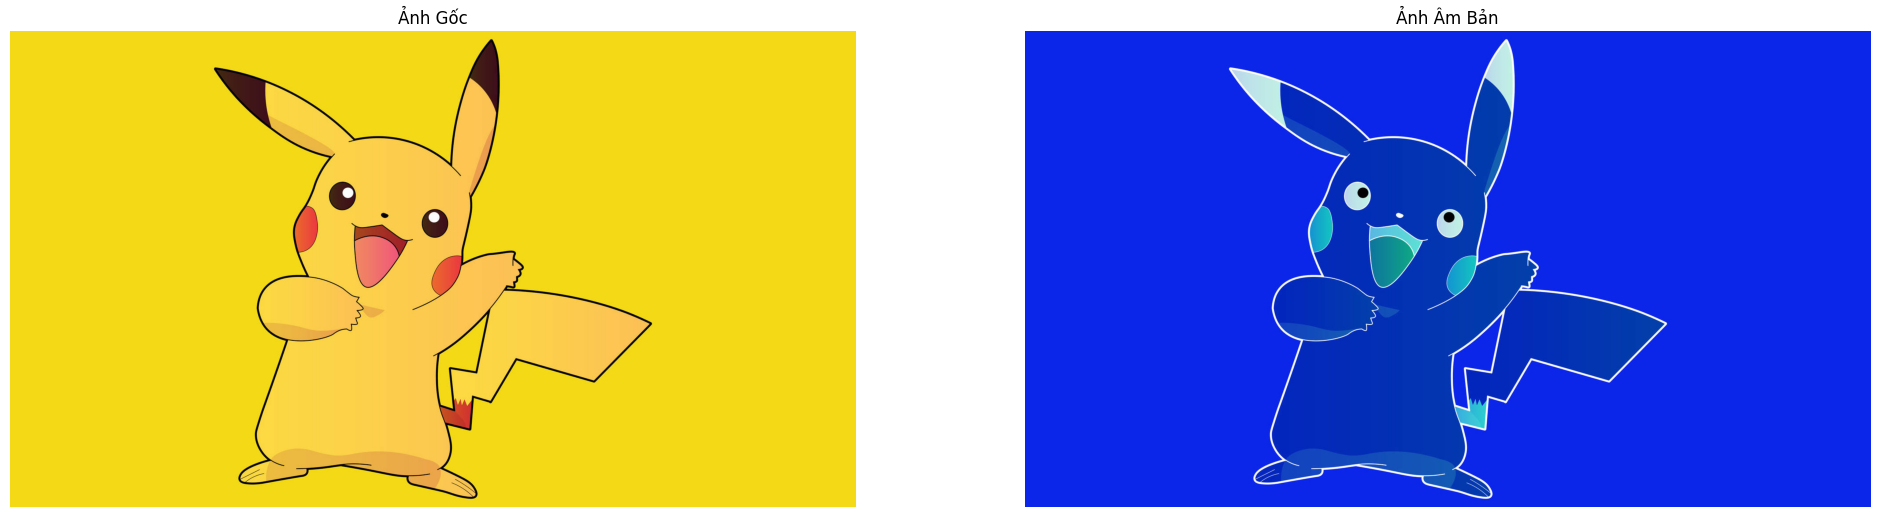

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg')

negative_img = 255 - img

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh Âm Bản')
plt.axis('off')

plt.show()


# 2.Phân ngưỡng (Thresholding)

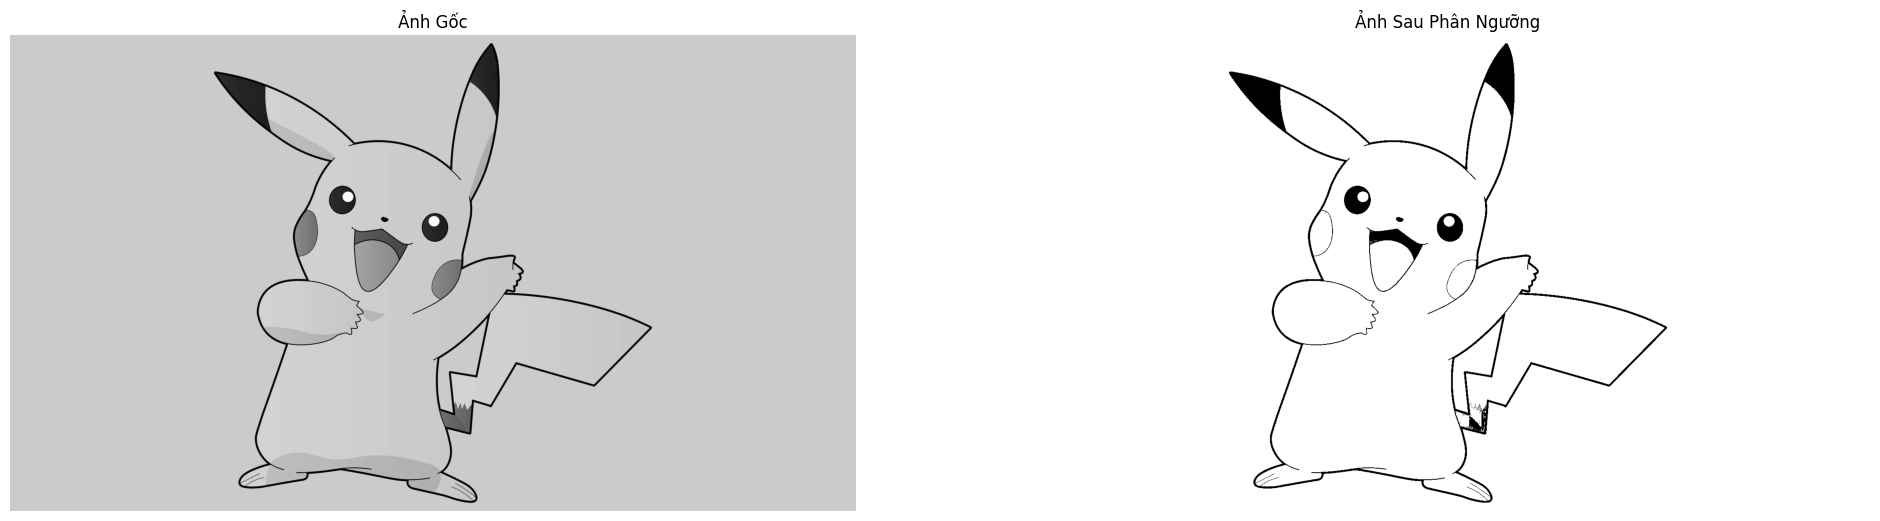

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

_, thresholded_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(24, 8))


plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Ảnh Sau Phân Ngưỡng')
plt.axis('off')

plt.show()


# 3.Biến đổi logarith

C:\Users\tien2\AppData\Local\Temp\ipykernel_13064\2384346710.py:8: RuntimeWarning: divide by zero encountered in log
  log_transformed_img = c * (np.log(img + 1))


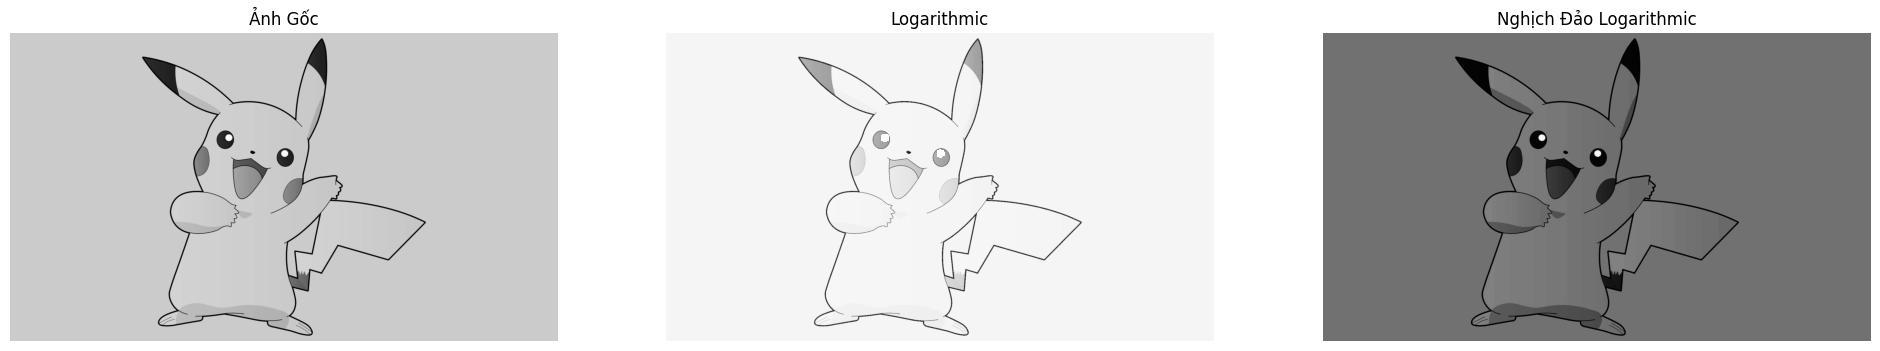

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(img))
log_transformed_img = c * (np.log(img + 1))
c2 = 255 / np.log(1 + np.max(img))
inverse_log_transformed_img = (2 ** (img / c)) - 1

# Create a larger figure
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_transformed_img, cmap='gray')
plt.title('Logarithmic')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_log_transformed_img, cmap='gray')
plt.title('Nghịch Đảo Logarithmic')
plt.axis('off')
plt.show()


# 4.Biến đổi hàm mũ

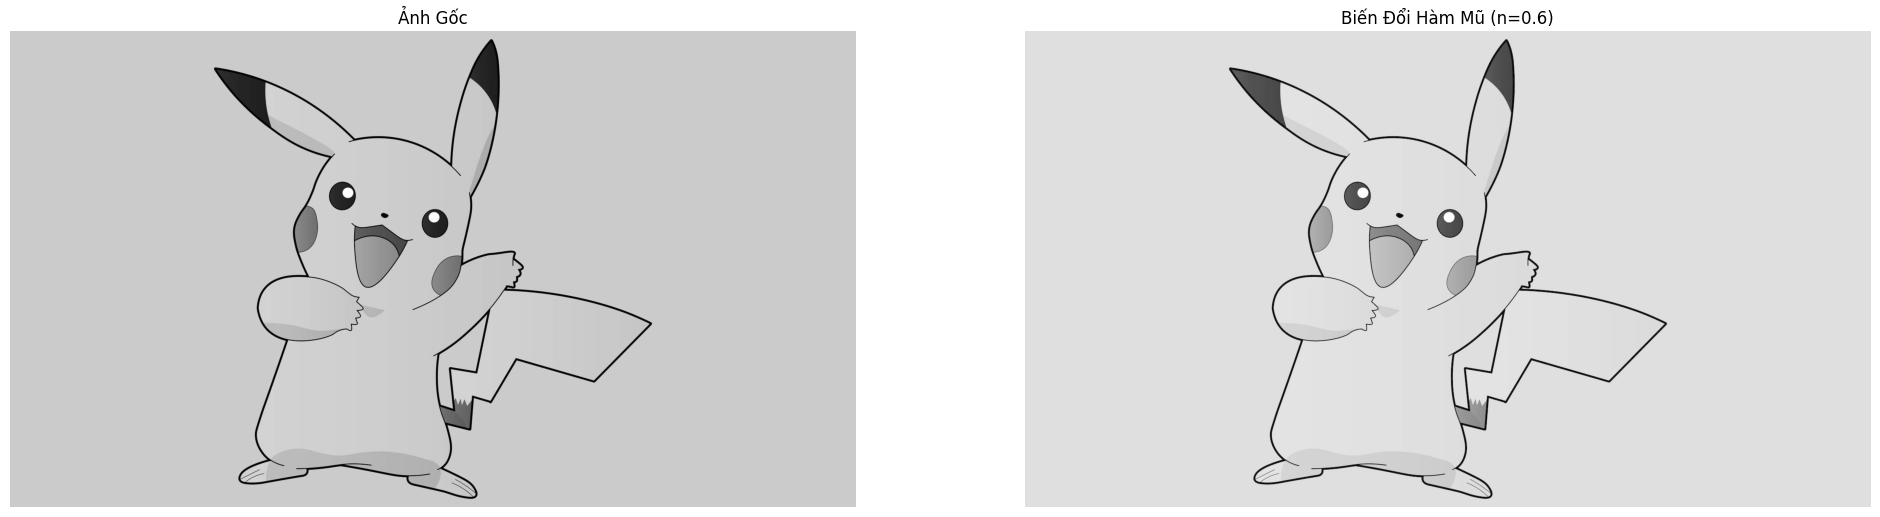

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

n = 0.6

power_law_transformed_img = np.power(img / 255.0, n) * 255.0
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(power_law_transformed_img, cmap='gray')
plt.title(f'Biến Đổi Hàm Mũ (n={n})')
plt.axis('off')

plt.show()


# 5.Toán tử láng giềng (neighborhood operators)

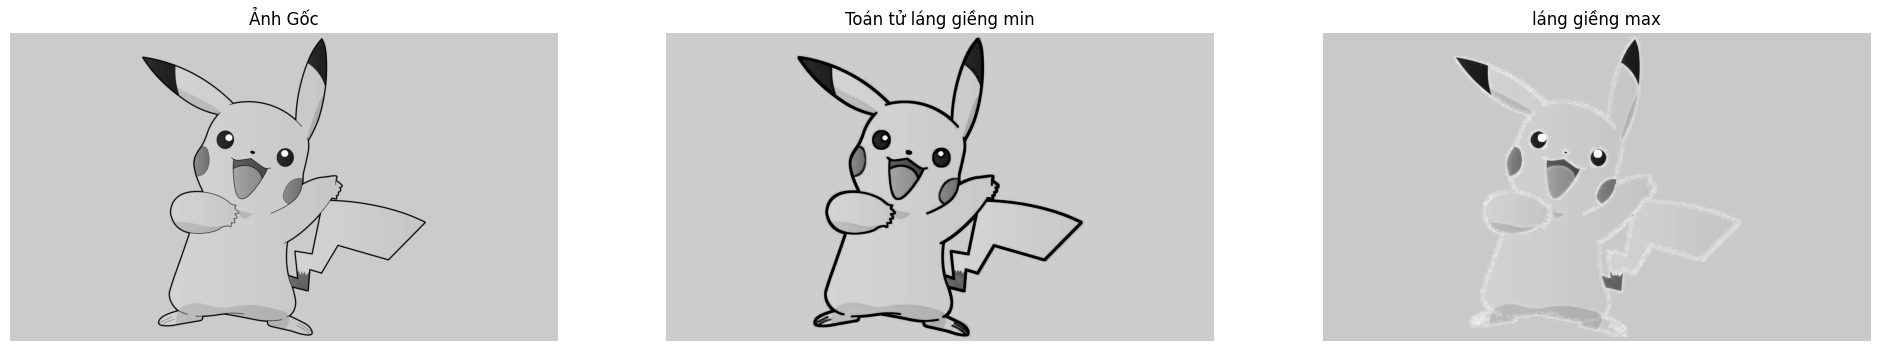

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = 6

min_filtered_img = cv2.erode(img, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)

max_filtered_img = cv2.dilate(img, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)

plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(min_filtered_img, cmap='gray')
plt.title('Toán tử láng giềng min')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(max_filtered_img, cmap='gray')
plt.title('láng giềng max')
plt.axis('off')

plt.show()


# 6.Làm mịn ảnh: Bộ lọc trung bình

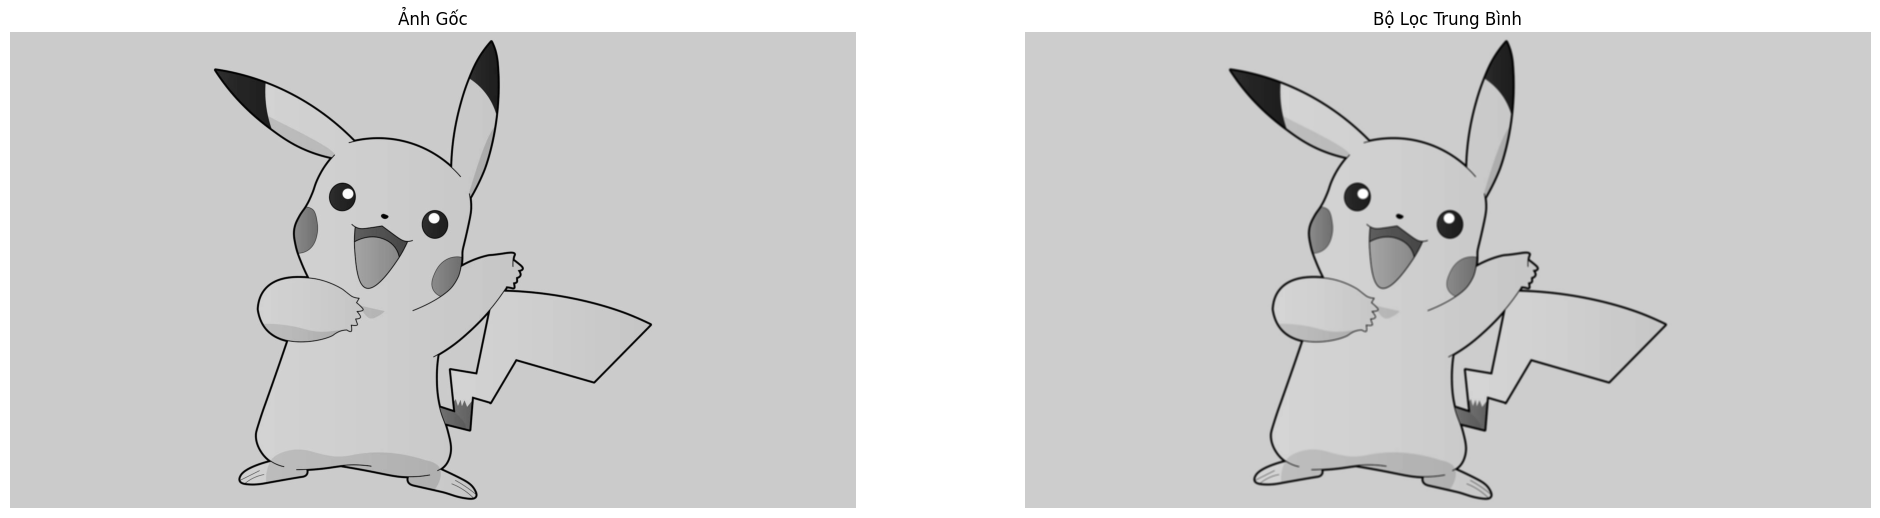

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = 5

mean_filtered_img = cv2.blur(img, (kernel_size, kernel_size))
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_filtered_img, cmap='gray')
plt.title('Bộ Lọc Trung Bình')
plt.axis('off')

plt.show()


# 7.Làm mịn ảnh: Bộ lọc trung vị

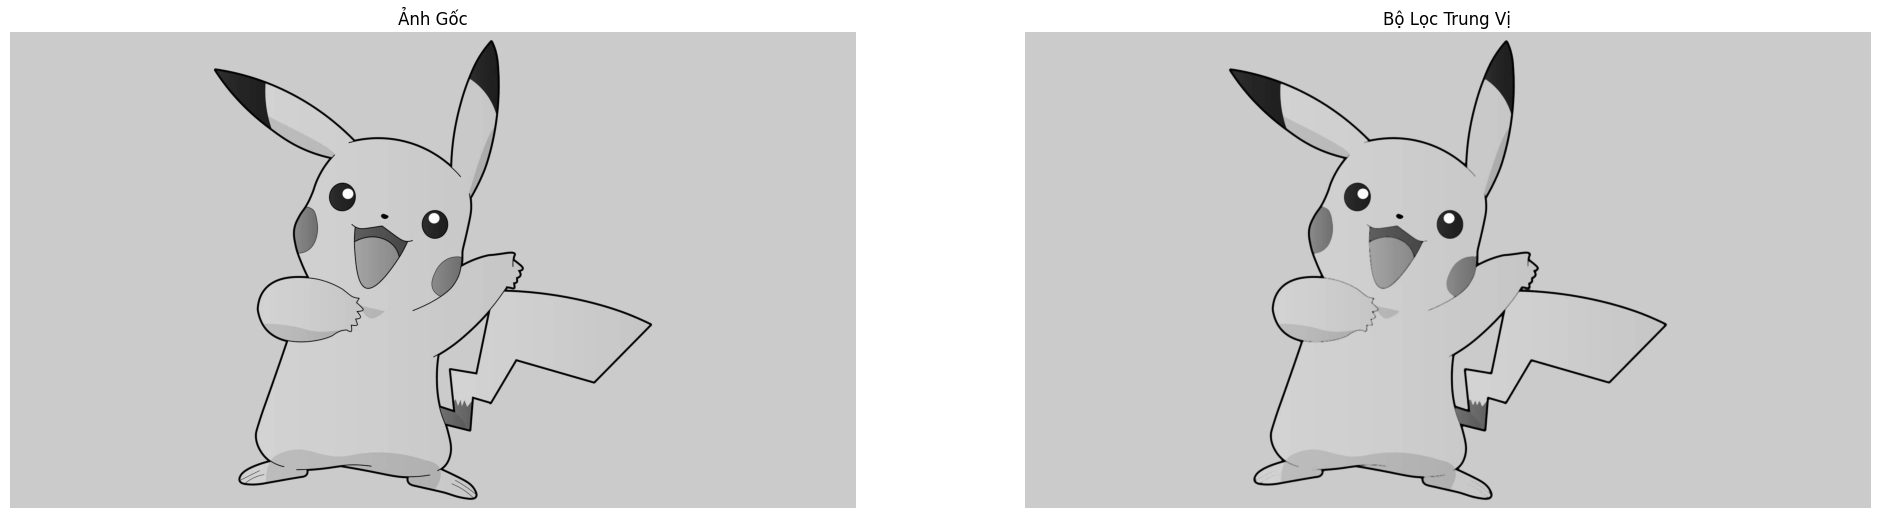

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = 5

median_filtered_img = cv2.medianBlur(img, kernel_size)
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Bộ Lọc Trung Vị')
plt.axis('off')

plt.show()


# 8.Phát hiện biên: 
	+ Gradient: Robert, sobel, prewitt
    + Đạo hàm bậc 2: Laplacian
	+ Phát hiện biên tối ưu: canny

 Gradient: Robert, sobel, prewitt

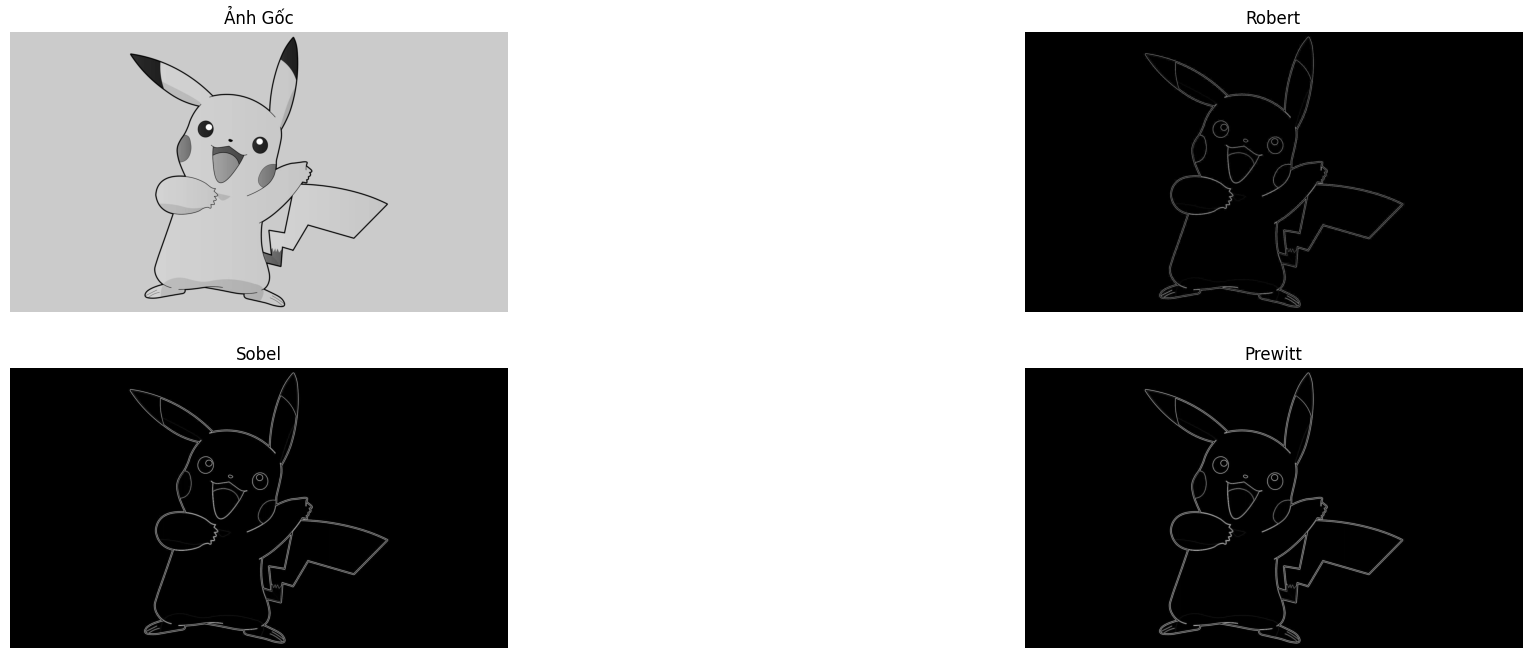

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

roberts_x = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, 0], [0, 1]]))
roberts_y = cv2.filter2D(img, cv2.CV_64F, np.array([[0, -1], [1, 0]]))
roberts_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

prewitt_x = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(img, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

plt.figure(figsize=(24, 8))

# plt.plot()
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(roberts_magnitude, cmap='gray')
plt.title('Robert')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt')
plt.axis('off')

plt.show()

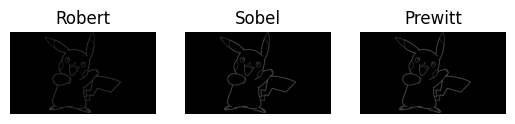

Đạo hàm bậc 2: Laplacian

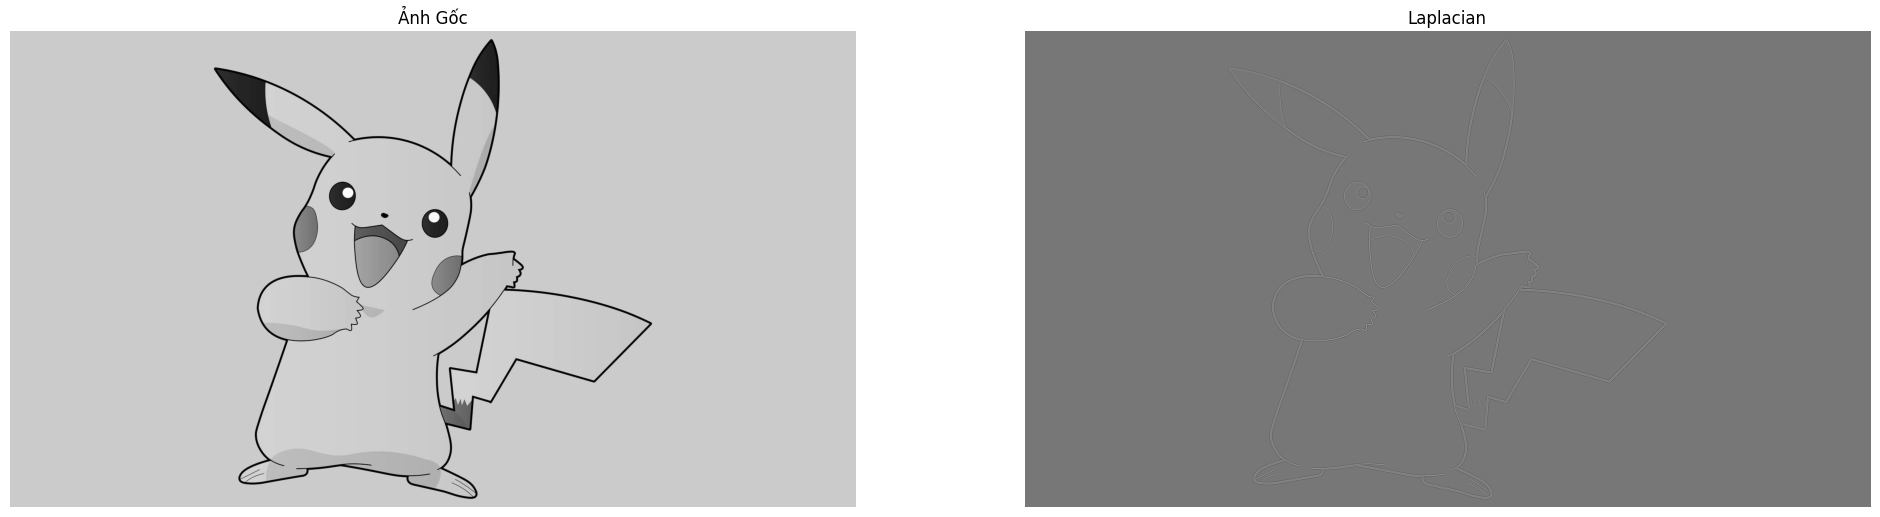

In [26]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

laplacian_img = cv2.Laplacian(img, cv2.CV_64F)

plt.figure(figsize=(24, 8))


plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_img, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()

Phát hiện biên tối ưu: canny

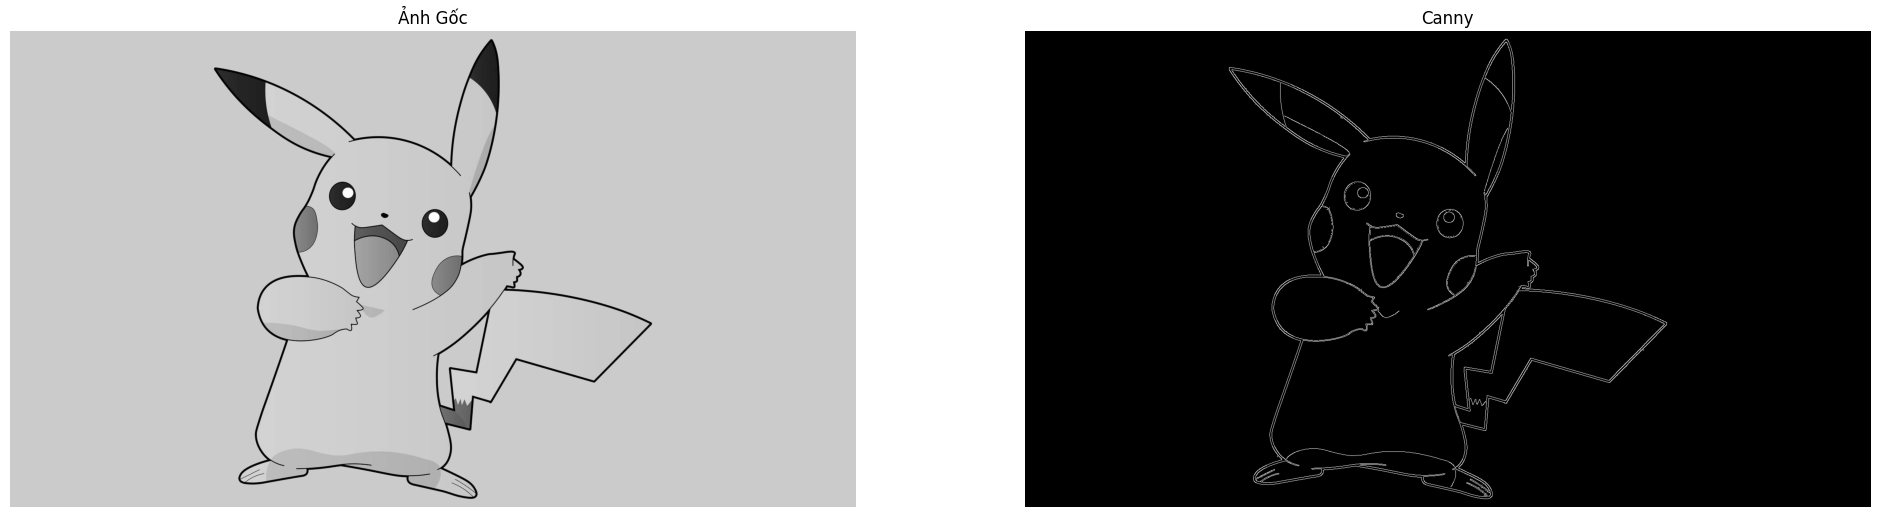

In [27]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

#Chọn ngưỡng dưới và ngưỡng trên
canny_img = cv2.Canny(img, 50, 150)
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_img, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.show()

# 9.Phân vùng theo ngưỡng biến độ: 
	+ Thuật toán OTSU
	+ Thuật toán đẳng liệu

Thuật Toán Otsu:

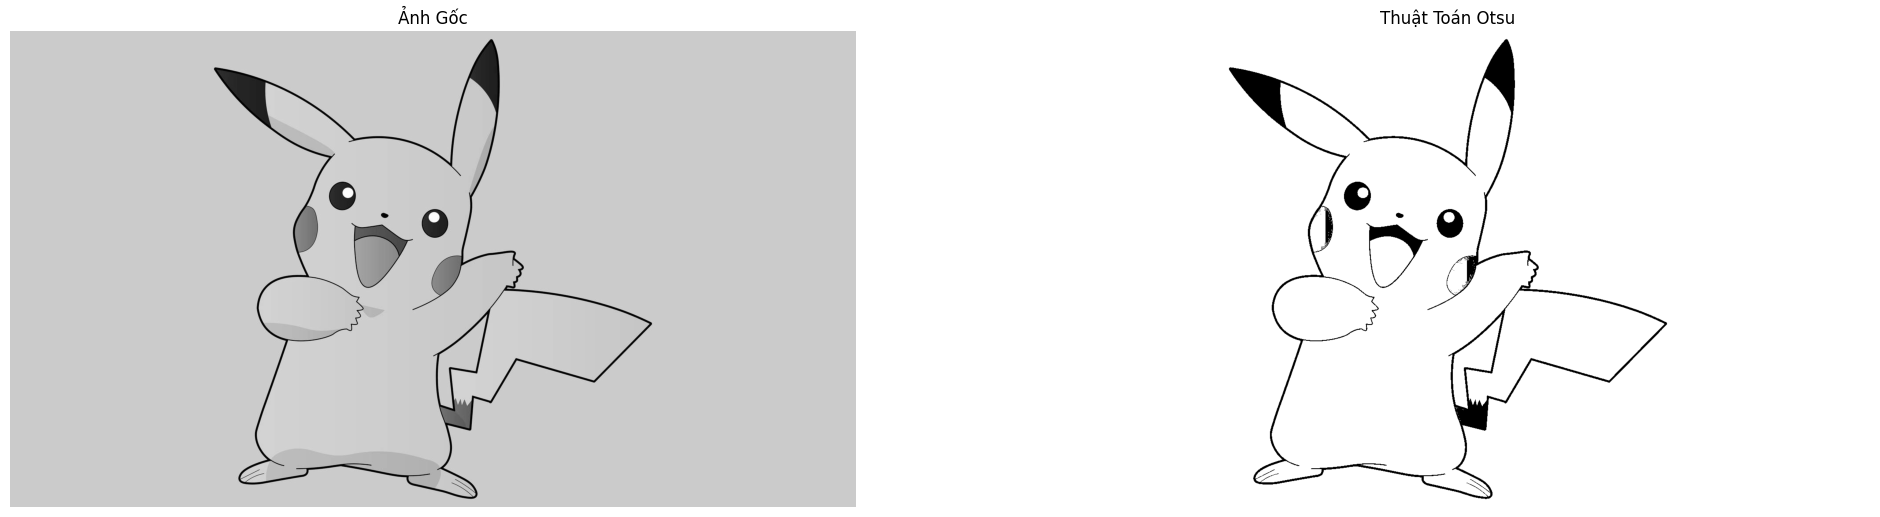

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng thuật toán Otsu
_, otsu_threshold_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_threshold_img, cmap='gray')
plt.title('Thuật Toán Otsu')
plt.axis('off')

plt.show()

Thuật Toán Đẳng Liệu (Histogram Equalization):

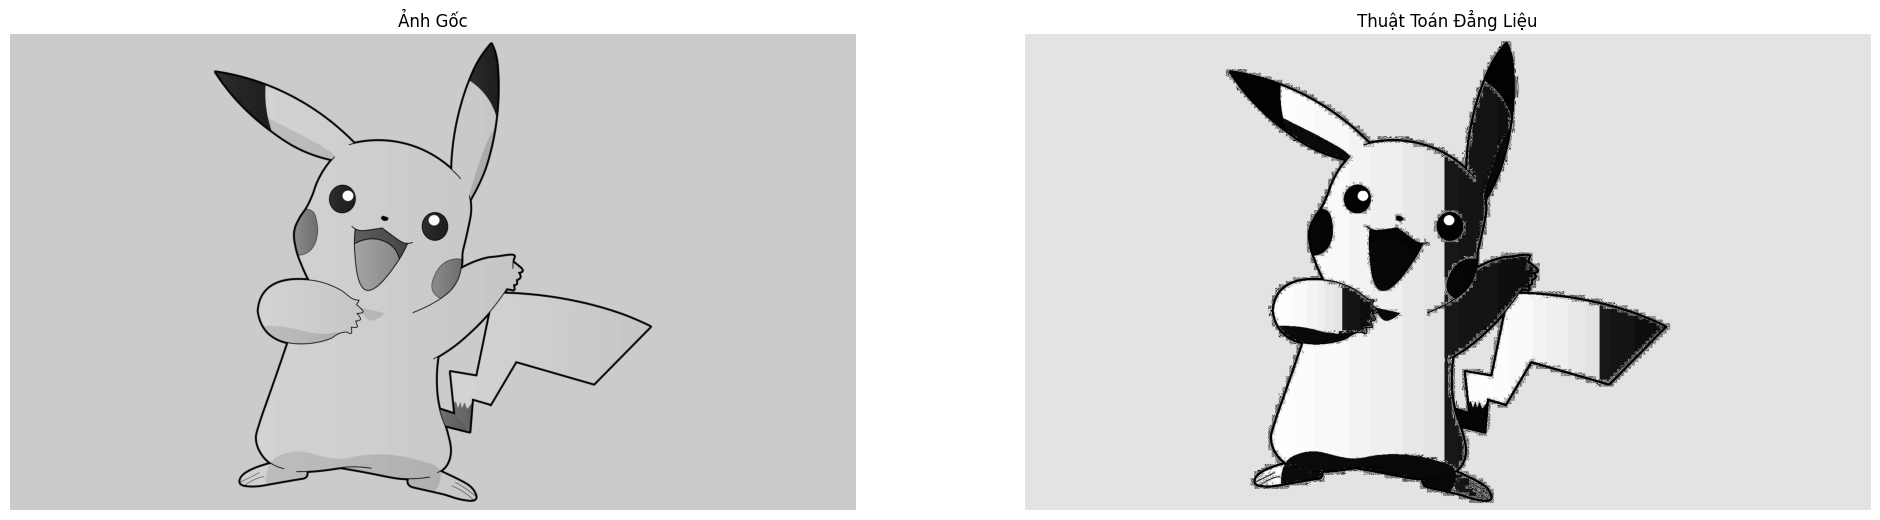

In [29]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng thuật toán đẳng liệu
equalized_img = cv2.equalizeHist(img)
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Thuật Toán Đẳng Liệu')
plt.axis('off')

plt.show()

# 10. Xử lí hình thái:
	+ Phép co
	+ Phép giãn
	+ Phép mở ảnh
	+ Phép đóng ảnh

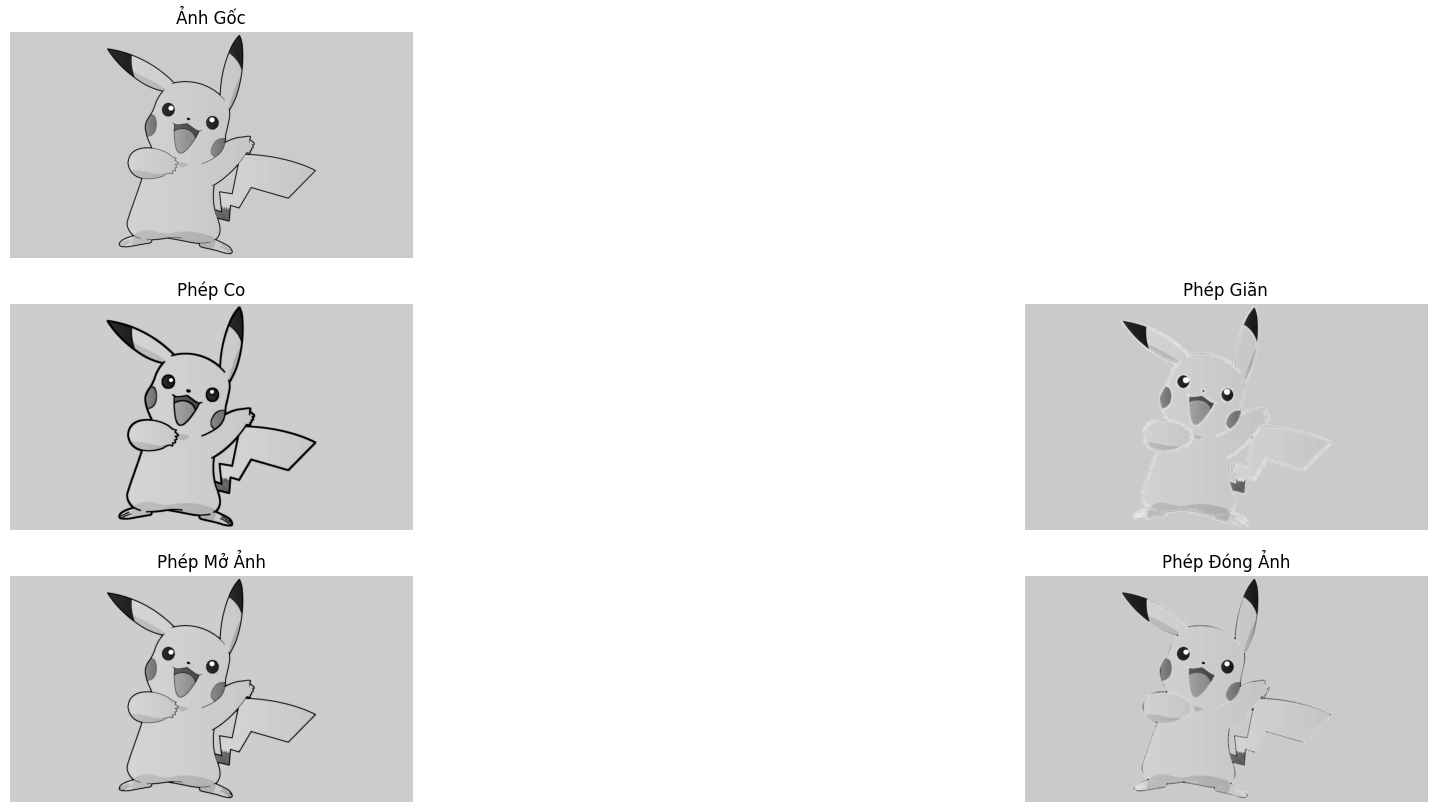

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./download.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), np.uint8)

erosion_img = cv2.erode(img, kernel, iterations=1)

dilation_img = cv2.dilate(img, kernel, iterations=1)

opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

closing_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(24, 10))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(erosion_img, cmap='gray')
plt.title('Phép Co')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(dilation_img, cmap='gray')
plt.title('Phép Giãn')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(opening_img, cmap='gray')
plt.title('Phép Mở Ảnh')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(closing_img, cmap='gray')
plt.title('Phép Đóng Ảnh')
plt.axis('off')

plt.show()
